# Gender and Age Detection System

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Required Libraries

In [2]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization,InputLayer
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from PIL import Image
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
conda install -c conda-forge tensorflow

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
df  = pd.read_csv("age_gender.csv (1).zip")

In [5]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
df['pixels'] =df['pixels'].apply(lambda x : np.array(x.split(),dtype="float32"))

In [7]:
df['pixels'] = df['pixels'].apply(lambda x : x /255)

In [8]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[0.5058824, 0.5019608, 0.5019608, 0.49411765, ..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[0.6431373, 0.2901961, 0.43529412, 0.65882355,..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[0.2627451, 0.27450982, 0.2784314, 0.27450982,..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[0.75686276, 0.77254903, 0.7764706, 0.78431374..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[0.7921569, 0.8039216, 0.81960785, 0.8235294, ..."


In [9]:
x = np.array(df['pixels'].tolist())
x = x.reshape(x.shape[0],48,48,1)

In [10]:
x.shape

(23705, 48, 48, 1)

# Sample Images

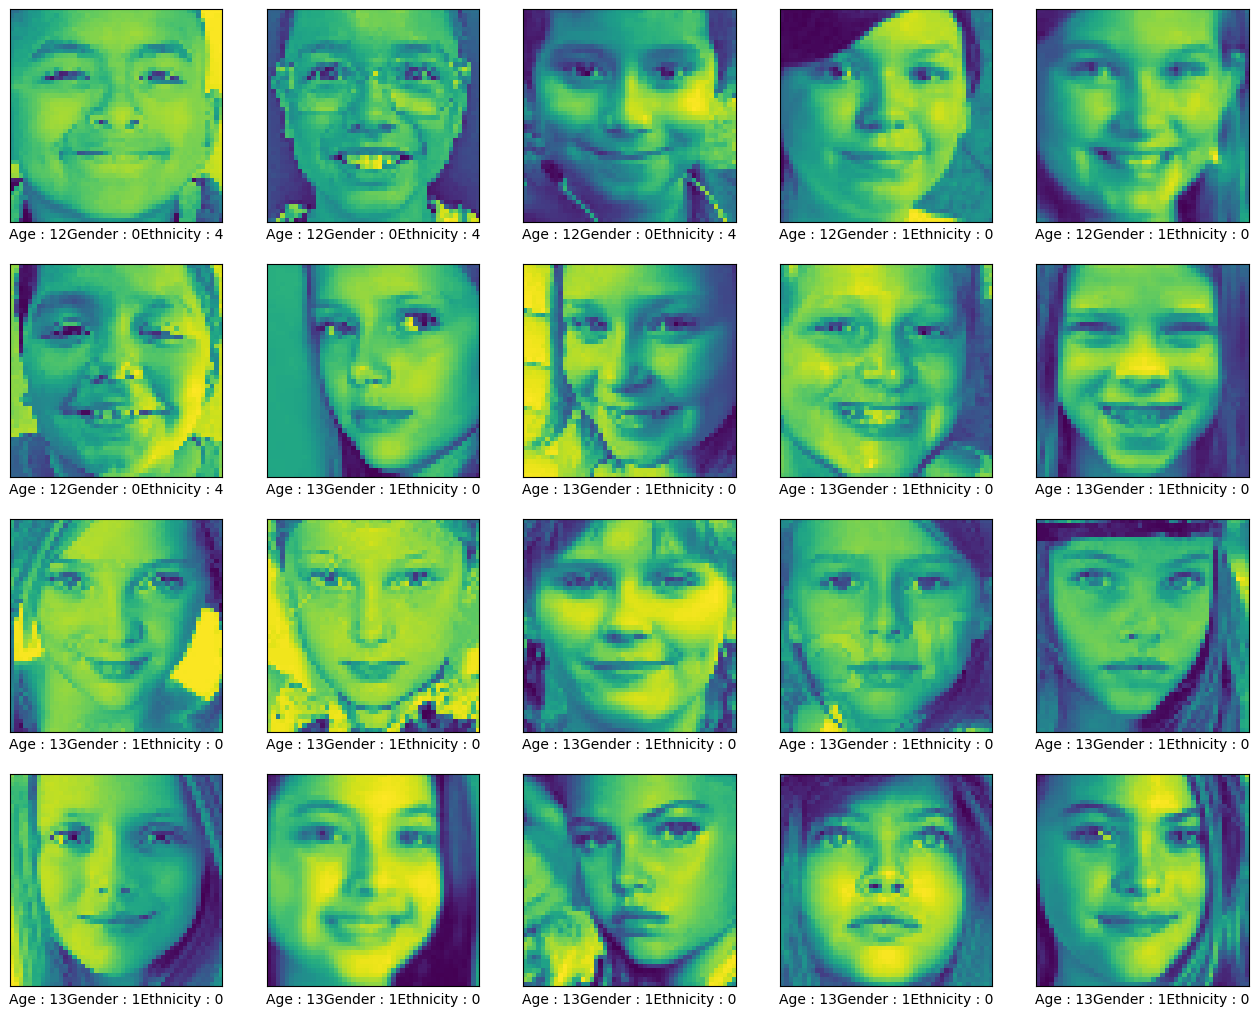

In [11]:
plt.figure(figsize=(16,16))

for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
    "Age : "+ str(df['age'].iloc[i])+
    "Gender : " +str(df['gender'].iloc[i])+
    "Ethnicity : " + str(df['ethnicity'].iloc[i])
    )
plt.show()

# Some Data Science

<Axes: ylabel='count'>

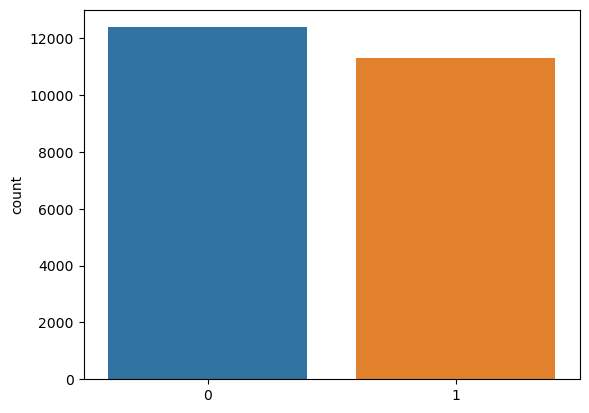

In [12]:
sns.countplot(x=df['gender'].values)

<Axes: xlabel='age', ylabel='Density'>

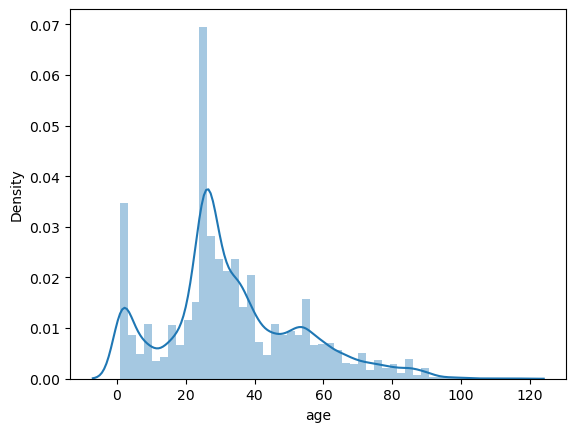

In [13]:
sns.distplot(a=df['age'])

<Axes: xlabel='ethnicity', ylabel='count'>

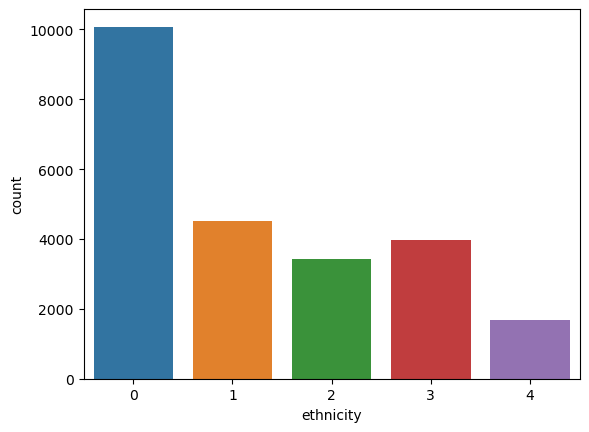

In [14]:
sns.countplot(x=df['ethnicity'])

# Model Creation

# split data

In [15]:
y = df['gender']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=42)

# taking y='gender'

In [16]:
class Custom(Callback):
    def on_epoch_end(self,epochs,logs={}):
        if logs.get("val_loss")<0.2700:
            print("Reached Loss 0.2700 !")
            self.model.stop_training= True
    
callback = Custom()
callbacks= [callback]

In [17]:
model = Sequential([
    InputLayer((48,48,1)),
    Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
    
])

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['acc'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 64)       256       
 hNormalization)                                                 
                                                        

In [19]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [21]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
history =  model.fit(x_train,y_train,epochs=30,validation_split=0.1,batch_size=64,callbacks=callbacks)

Epoch 1/30
260/260 [==============================] - 22s 80ms/step - loss: 0.4373 - acc: 0.7937 - val_loss: 0.5547 - val_acc: 0.7101
Epoch 2/30
260/260 [==============================] - 35s 132ms/step - loss: 0.3166 - acc: 0.8597 - val_loss: 0.3778 - val_acc: 0.8259
Epoch 3/30
260/260 [==============================] - 36s 137ms/step - loss: 0.2799 - acc: 0.8754 - val_loss: 0.3060 - val_acc: 0.8670
Epoch 4/30
260/260 [==============================] - 34s 130ms/step - loss: 0.2539 - acc: 0.8925 - val_loss: 0.2719 - val_acc: 0.8799
Epoch 5/30
260/260 [==============================] - 38s 145ms/step - loss: 0.2318 - acc: 0.9017 - val_loss: 0.3059 - val_acc: 0.8605
Epoch 6/30
260/260 [==============================] - 47s 180ms/step - loss: 0.2149 - acc: 0.9127 - val_loss: 0.2637 - val_acc: 0.8843


<Axes: title={'center': 'accuracy'}>

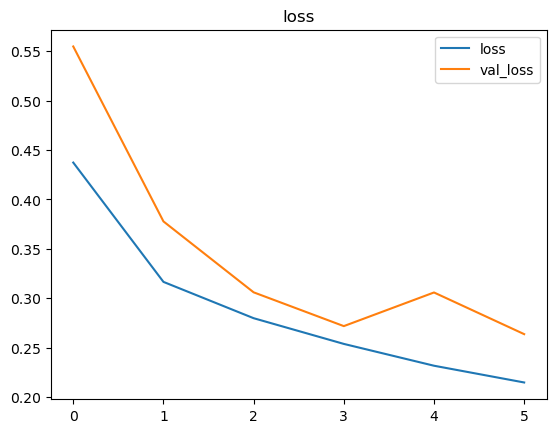

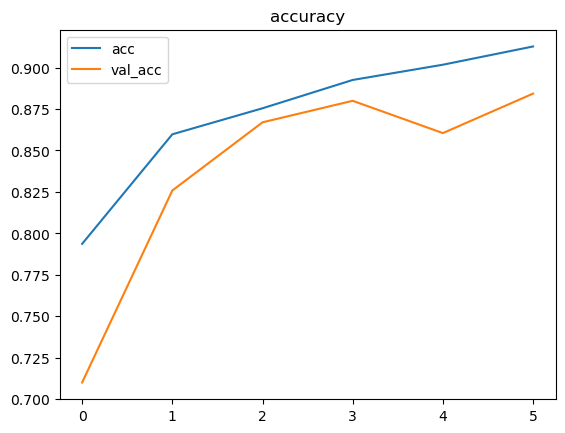

In [23]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['acc','val_acc']].plot(title='accuracy')

In [24]:
loss,acc = model.evaluate(x_test,y_test)
acc

163/163 [==============================] - 2s 15ms/step - loss: 0.2703 - acc: 0.8806


0.8805598020553589

# taking y ='ethnicity'

In [25]:
y = df['ethnicity']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=42)

In [26]:
class Custom(Callback):
    def on_epoch_end(self,epochs,logs={}):
        if logs.get("val_acc") > 0.790:
            print("Reached acc 79% !")
            self.model.stop_training= True
    
callback = Custom()
callbacks= [callback]

In [27]:
model_eth = Sequential([
    InputLayer((48,48,1)),
    Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(5)
    
])

model_eth.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='rmsprop',metrics=['acc'])

In [28]:
model_eth.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [29]:
plot_model(model_eth)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
history  = model_eth.fit(x_train,y_train,epochs=16,validation_split=0.1,batch_size=64,callbacks=callbacks)

Epoch 1/16
260/260 [==============================] - 30s 109ms/step - loss: 1.2576 - acc: 0.5225 - val_loss: 0.9609 - val_acc: 0.6474
Epoch 2/16
260/260 [==============================] - 24s 93ms/step - loss: 0.9860 - acc: 0.6508 - val_loss: 0.8383 - val_acc: 0.7296
Epoch 3/16
260/260 [==============================] - 29s 112ms/step - loss: 0.8960 - acc: 0.6888 - val_loss: 0.7909 - val_acc: 0.7409
Epoch 4/16
260/260 [==============================] - 25s 96ms/step - loss: 0.8283 - acc: 0.7147 - val_loss: 0.7227 - val_acc: 0.7593
Epoch 5/16
260/260 [==============================] - 25s 96ms/step - loss: 0.7843 - acc: 0.7272 - val_loss: 0.7376 - val_acc: 0.7561
Epoch 6/16
260/260 [==============================] - 30s 115ms/step - loss: 0.7553 - acc: 0.7441 - val_loss: 0.6794 - val_acc: 0.7631
Epoch 7/16
260/260 [==============================] - 27s 106ms/step - loss: 0.7247 - acc: 0.7495 - val_loss: 0.6766 - val_acc: 0.7680
Epoch 8/16
260/260 [==============================] - 26s 

<Axes: title={'center': 'accuracy'}>

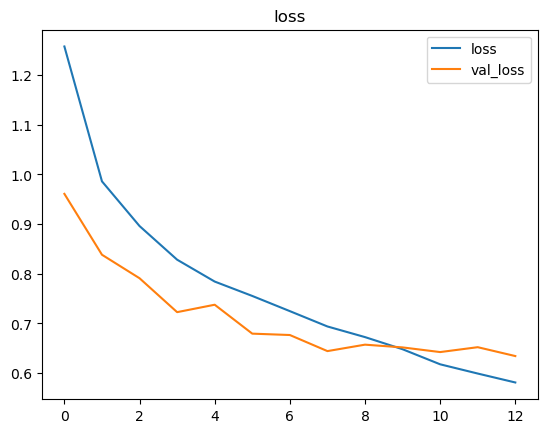

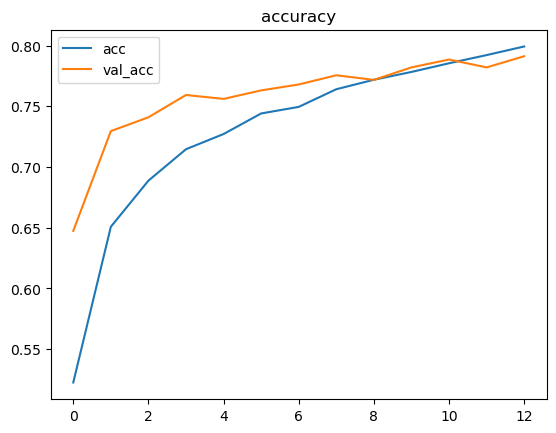

In [31]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['acc','val_acc']].plot(title='accuracy')

In [32]:
loss,acc = model_eth.evaluate(x_test,y_test)
acc

163/163 [==============================] - 2s 12ms/step - loss: 0.6385 - acc: 0.7755


0.7754984498023987

# Taking y='age'

In [33]:
class Custom(Callback):
    def on_epoch_end(self,epochs,logs={}):
        if (logs.get("val_loss")<110):
            print("Reached 110 val_loss  !")
            self.model.stop_training= True
    
callback = Custom()
callbacks= [callback]

In [34]:
y = df['age']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=42)

In [35]:
model_age = Sequential([
    InputLayer((48,48,1)),
    Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='relu')
    
])

model_age.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [36]:
model_age.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 21, 21, 64)       256       
 hNormalization)                                                 
                                                      

In [37]:
plot_model(model_age)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [38]:
history = model_age.fit(x_train,y_train,epochs=20,validation_split=0.1,batch_size=64,callbacks=callbacks)

Epoch 1/20
260/260 [==============================] - 29s 105ms/step - loss: 240.5741 - mae: 11.5659 - val_loss: 334.8740 - val_mae: 14.5468
Epoch 2/20
260/260 [==============================] - 30s 114ms/step - loss: 164.8260 - mae: 9.5044 - val_loss: 304.4406 - val_mae: 13.1146
Epoch 3/20
260/260 [==============================] - 25s 96ms/step - loss: 145.3737 - mae: 8.9281 - val_loss: 418.6725 - val_mae: 17.5969
Epoch 4/20
260/260 [==============================] - 25s 97ms/step - loss: 137.9733 - mae: 8.6777 - val_loss: 627.1304 - val_mae: 22.4685
Epoch 5/20
260/260 [==============================] - 25s 98ms/step - loss: 125.0217 - mae: 8.3238 - val_loss: 268.9456 - val_mae: 12.2702
Epoch 6/20
260/260 [==============================] - 25s 96ms/step - loss: 124.1111 - mae: 8.2210 - val_loss: 121.3630 - val_mae: 8.0414
Epoch 7/20
260/260 [==============================] - 24s 93ms/step - loss: 116.3002 - mae: 8.0117 - val_loss: 109.8364 - val_mae: 7.9461


<Axes: title={'center': 'loss'}>

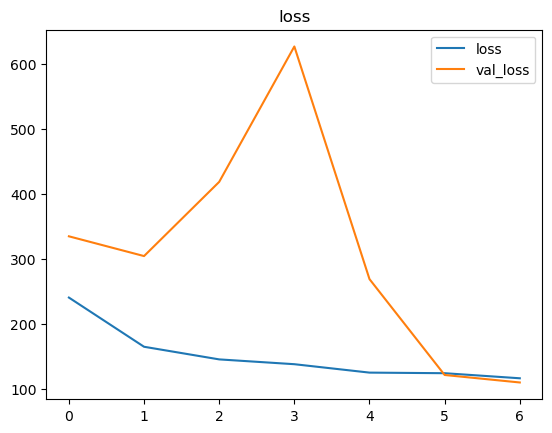

In [39]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(title='loss')

In [40]:
mse,mae = model_age.evaluate(x_test,y_test)
mse,mae

163/163 [==============================] - 3s 18ms/step - loss: 111.8118 - mae: 8.0908


(111.811767578125, 8.090765953063965)

# Make Predictions

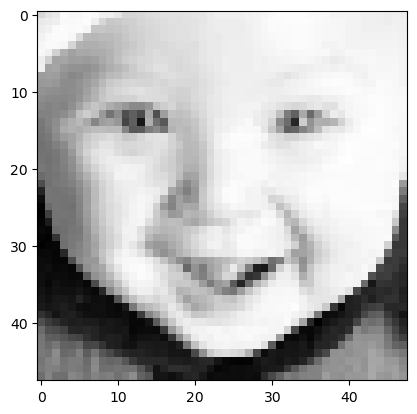

In [41]:
ind = 458
img = df['pixels'].iloc[ind].reshape(48,48)

plt.imshow(img,cmap='gray')
plt.show()

In [42]:
Tage = df['age'].iloc[ind] #True Age 
Tgender = df['gender'].iloc[ind] # True gender
Teth =df['ethnicity'].iloc[ind] # True Ethnicty 
Tage,Tgender,Teth

(1, 0, 0)

In [43]:
def predict(model_,img):
    pred = np.argmax(model_.predict(img),axis=1)
    return pred

In [44]:
img = img.reshape(-1,48,48,1)
age = predict(model_age,img)[0]


genders = ['male','female']
gender = genders[predict(model,img)[0]]
eth = predict(model_eth,img)[0]

age,gender,eth

1/1 [==============================] - 0s 185ms/step


(0, 'male', 0)

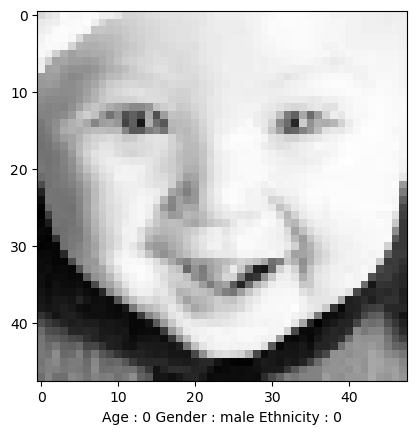

In [45]:
img = img.reshape(48,48,1)
plt.imshow(img,cmap='gray')
plt.xlabel(
    "Age : "+str(age)+
    " Gender : "+gender+
    " Ethnicity : "+str(age)
)
plt.show()